<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_Molecular_Biology_Genetics/blob/lesson6/GB_molecular_Biology_Genetics_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 6.


Повторно выполнить задание к 4 занятию / повторно выполнить задание к 5 занятию / повторить выполнение исследования из статьи.



Посредством AlphaFold предскажите структуру белка, если она неизвестна. Если известна, найдите белок с неизвестной структурой и предскажите его 3D-структуру, воспользовавшись AlphaFold.

In [ ]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Bio import Entrez
Entrez.email = "A.N.Other@example.com"
from Bio import SeqIO
from Bio.Seq import MutableSeq
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import pandas as pd
import xml.etree.ElementTree as ET


import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dis = pd.read_table('https://github.com/nedokormysh/GB_intro_Molecular_Biology_Genetic/raw/lesson1/curated_gene_disease_associations_june_4_2020.tsv.gz')
dis = dis[['geneId',	'geneSymbol',	'DSI',	'DPI',	'diseaseId',	'diseaseName',	'diseaseType',	'diseaseClass']]
dis.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04


In [ ]:
dis[0:10]

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04
5,2,A2M,0.529,0.769,C0011265,Presenile dementia,disease,C10;F03
6,2,A2M,0.529,0.769,C0011570,Mental Depression,disease,F01
7,2,A2M,0.529,0.769,C0011581,Depressive disorder,disease,F03
8,2,A2M,0.529,0.769,C0019202,Hepatolenticular Degeneration,disease,C16;C06;C18;C10
9,2,A2M,0.529,0.769,C0022660,"Kidney Failure, Acute",disease,C13;C12


In [ ]:
dis[dis['geneSymbol'] = 'AADAC']

['A1BG' 'A2M' 'NAT1' 'NAT2' 'SERPINA3' 'AADAC' 'AANAT' 'AARS1' 'ABAT'
 'ABCA1']


In [ ]:
handle = Entrez.esummary(db="gene", id=790, rettype = 'xml')
record = Entrez.read(handle)
record['DocumentSummarySet']['DocumentSummary'][0]['Name']

In [ ]:
handle = Entrez.esearch(db="structure",
                        term='AADAC[Gene Name] AND "homo sapiens"[Organism]',
                        idtype="acc",
                        retmax=40)
record = Entrez.read(handle)
handle.close()
record

{'Count': '0', 'RetMax': '0', 'RetStart': '0', 'IdList': [], 'TranslationSet': [], 'QueryTranslation': 'AADAC[Gene Name] AND "homo sapiens"[Organism]', 'ErrorList': {'FieldNotFound': [], 'PhraseNotFound': ['AADAC[Gene Name]']}, 'WarningList': {'PhraseIgnored': [], 'OutputMessage': ['No items found.'], 'QuotedPhraseNotFound': []}}

Получим список id протеинов и выберем один из вариантов.

In [ ]:
handle = Entrez.esearch(db="protein",
                        term='AADAC[Gene Name] AND "homo sapiens"[Organism]',
                        # usehistory="y",
                        retmax=100)
record = Entrez.read(handle)
handle.close()
record['IdList']

['2462587015', '2462587013', '2462587011', '530373892', '317373587', '68299767', '119599198', '119599197', '21595551']

Получим последовательность выбранного белка.

In [ ]:
handle = Entrez.efetch(db="protein",
                           id=2462587015,
                           rettype = 'fasta',
                           retmode = 'text')
record = SeqIO.read(handle, 'fasta')
record.seq

Seq('MGRKSLYLLIVGILIAYYIYTPLPDNVEEPWRMMWINAHLKTIQNLVVGSFDEV...ENL')

In [ ]:
print(record.seq)

MGRKSLYLLIVGILIAYYIYTPLPDNVEEPWRMMWINAHLKTIQNLVVGSFDEVPPTSDENVTVTETKFNNILVRVYVPKRKSEALRRGLFYIHGGGWCVGSAALSGYDLLSRWTADRLDAVVVSTNYRLAPKYHFPIQFEDVYNALRWFLRKKVLAKYGVNPERIGISGDSAGGNLAAAVTQQLLDDPDVKIKLKIQSLIYPALQPLDVDLPSYQENSNFLFLSKSLMVRFWSEYFTTDRSLEKAMLSRQHVPVESSHLFKFINWSSLLPERFIKGHVYNNPNYGSSELAKKYPGFLDVRAAPLLADDNKLRGLPLTYVITCQYDLLRDDGLMYVTRLRNTGVQVTHNHVEDGFHGAFSFLGLKISHRLINQYIEWLKENL


# AlphaFold Colab

This Colab notebook allows you to easily predict the structure of a protein using a slightly simplified version of [AlphaFold v2.3.2](https://doi.org/10.1038/s41586-021-03819-2).

**Differences to AlphaFold v2.3.2**

In comparison to AlphaFold v2.3.2, this Colab notebook uses **no templates (homologous structures)** and a selected portion of the [BFD database](https://bfd.mmseqs.com/). We have validated these changes on several thousand recent PDB structures. While accuracy will be near-identical to the full AlphaFold system on many targets, a small fraction have a large drop in accuracy due to the smaller MSA and lack of templates. For best reliability, we recommend instead using the [full open source AlphaFold](https://github.com/deepmind/alphafold/), or the [AlphaFold Protein Structure Database](https://alphafold.ebi.ac.uk/).

**This Colab has a small drop in average accuracy for multimers compared to local AlphaFold installation, for full multimer accuracy it is highly recommended to run [AlphaFold locally](https://github.com/deepmind/alphafold#running-alphafold).** Moreover, the AlphaFold-Multimer requires searching for MSA for every unique sequence in the complex, hence it is substantially slower. If your notebook times-out due to slow multimer MSA search, we recommend either using Colab Pro or running AlphaFold locally.

Please note that this Colab notebook is provided for theoretical modelling only and caution should be exercised in its use.

The **PAE file format** has been updated to match AFDB. Please see the [AFDB FAQ](https://alphafold.ebi.ac.uk/faq/#faq-7) for a description of the new format.

**Citing this work**

Any publication that discloses findings arising from using this notebook should [cite](https://github.com/deepmind/alphafold/#citing-this-work) the [AlphaFold paper](https://doi.org/10.1038/s41586-021-03819-2).

**Licenses**

This Colab uses the [AlphaFold model parameters](https://github.com/deepmind/alphafold/#model-parameters-license) which are subject to the Creative Commons Attribution 4.0 International ([CC BY 4.0](https://creativecommons.org/licenses/by/4.0/legalcode)) license. The Colab itself is provided under the [Apache 2.0 license](https://www.apache.org/licenses/LICENSE-2.0). See the full license statement below.

**More information**

You can find more information about how AlphaFold works in the following papers:

*   [AlphaFold methods paper](https://www.nature.com/articles/s41586-021-03819-2)
*   [AlphaFold predictions of the human proteome paper](https://www.nature.com/articles/s41586-021-03828-1)
*   [AlphaFold-Multimer paper](https://www.biorxiv.org/content/10.1101/2021.10.04.463034v1)

FAQ on how to interpret AlphaFold predictions are [here](https://alphafold.ebi.ac.uk/faq).

If you have any questions not covered in the FAQ, please contact the AlphaFold team at alphafold@deepmind.com.

**Get in touch**

We would love to hear your feedback and understand how AlphaFold has been useful in your research. Share your stories with us at alphafold@deepmind.com.


## Setup

Start by running the 2 cells below to set up AlphaFold and all required software.

In [ ]:
# Set environment variables before running any other code.
import os
os.environ['TF_FORCE_UNIFIED_MEMORY'] = '1'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '4.0'

#@title 1. Install third-party software

#@markdown Please execute this cell by pressing the _Play_ button
#@markdown on the left to download and import third-party software
#@markdown in this Colab notebook. (See the [acknowledgements](https://github.com/deepmind/alphafold/#acknowledgements) in our readme.)

#@markdown **Note**: This installs the software on the Colab
#@markdown notebook in the cloud and not on your computer.

from IPython.utils import io
import os
import subprocess
import tqdm.notebook

TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
      # Uninstall default Colab version of TF.
      %shell pip uninstall -y tensorflow

      %shell sudo apt install --quiet --yes hmmer
      pbar.update(6)

      # Install py3dmol.
      %shell pip install py3dmol
      pbar.update(2)

      # Install OpenMM and pdbfixer.
      %shell rm -rf /opt/conda
      %shell wget -q -P /tmp \
        https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh \
          && bash /tmp/Miniconda3-latest-Linux-x86_64.sh -b -p /opt/conda \
          && rm /tmp/Miniconda3-latest-Linux-x86_64.sh
      pbar.update(9)

      PATH=%env PATH
      %env PATH=/opt/conda/bin:{PATH}
      %shell conda install -qy conda==4.13.0 \
          && conda install -qy -c conda-forge \
            python=3.10 \
            openmm=7.7.0 \
            pdbfixer
      pbar.update(80)

      # Create a ramdisk to store a database chunk to make Jackhmmer run fast.
      %shell sudo mkdir -m 777 --parents /tmp/ramdisk
      %shell sudo mount -t tmpfs -o size=9G ramdisk /tmp/ramdisk
      pbar.update(2)

      %shell wget -q -P /content \
        https://git.scicore.unibas.ch/schwede/openstructure/-/raw/7102c63615b64735c4941278d92b554ec94415f8/modules/mol/alg/src/stereo_chemical_props.txt
      pbar.update(1)
except subprocess.CalledProcessError:
  print(captured)
  raise

executed_cells = set([1])

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

In [ ]:
#@title 2. Download AlphaFold

#@markdown Please execute this cell by pressing the *Play* button on
#@markdown the left.

GIT_REPO = 'https://github.com/deepmind/alphafold'
SOURCE_URL = 'https://storage.googleapis.com/alphafold/alphafold_params_colab_2022-12-06.tar'
PARAMS_DIR = './alphafold/data/params'
PARAMS_PATH = os.path.join(PARAMS_DIR, os.path.basename(SOURCE_URL))

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
      %shell rm -rf alphafold
      %shell git clone --branch main {GIT_REPO} alphafold
      pbar.update(8)
      # Install the required versions of all dependencies.
      %shell pip3 install -r ./alphafold/requirements.txt
      # Run setup.py to install only AlphaFold.
      %shell pip3 install --no-dependencies ./alphafold
      %shell pip3 install --upgrade pyopenssl
      pbar.update(10)

      # Make sure stereo_chemical_props.txt is in all locations where it could be searched for.
      %shell mkdir -p /content/alphafold/alphafold/common
      %shell cp -f /content/stereo_chemical_props.txt /content/alphafold/alphafold/common
      %shell mkdir -p /opt/conda/lib/python3.10/site-packages/alphafold/common/
      %shell cp -f /content/stereo_chemical_props.txt /opt/conda/lib/python3.10/site-packages/alphafold/common/

      # Load parameters
      %shell mkdir --parents "{PARAMS_DIR}"
      %shell wget -O "{PARAMS_PATH}" "{SOURCE_URL}"
      pbar.update(27)

      %shell tar --extract --verbose --file="{PARAMS_PATH}" \
        --directory="{PARAMS_DIR}" --preserve-permissions
      %shell rm "{PARAMS_PATH}"
      pbar.update(55)
except subprocess.CalledProcessError:
  print(captured)
  raise

import jax
if jax.local_devices()[0].platform == 'tpu':
  raise RuntimeError('Colab TPU runtime not supported. Change it to GPU via Runtime -> Change Runtime Type -> Hardware accelerator -> GPU.')
elif jax.local_devices()[0].platform == 'cpu':
  raise RuntimeError('Colab CPU runtime not supported. Change it to GPU via Runtime -> Change Runtime Type -> Hardware accelerator -> GPU.')
else:
  print(f'Running with {jax.local_devices()[0].device_kind} GPU')

# Make sure everything we need is on the path.
import sys
sys.path.append('/opt/conda/lib/python3.10/site-packages')
sys.path.append('/content/alphafold')

executed_cells.add(2)

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

Running with Tesla T4 GPU


## Making a prediction

Please paste the sequence of your protein in the text box below, then run the remaining cells via _Runtime_ > _Run after_. You can also run the cells individually by pressing the _Play_ button on the left.

Note that the search against databases and the actual prediction can take some time, from minutes to hours, depending on the length of the protein and what type of GPU you are allocated by Colab (see FAQ below).

In [ ]:
#@title 3. Enter the amino acid sequence(s) to fold ⬇️
#@markdown Enter the amino acid sequence(s) to fold:
#@markdown * If you enter only a single sequence, the monomer model will be
#@markdown used (unless you override this below).
#@markdown * If you enter multiple sequences, the multimer model will be used.

from alphafold.notebooks import notebook_utils
# Track cell execution to ensure correct order.
notebook_utils.check_cell_execution_order(executed_cells, 3)

import enum

@enum.unique
class ModelType(enum.Enum):
  MONOMER = 0
  MULTIMER = 1

sequence_1 = 'MGRKSLYLLIVGILIAYYIYTPLPDNVEEPWRMMWINAHLKTIQNLVVGSFDEVPPTSDENVTVTETKFNNILVRVYVPKRKSEALRRGLFYIHGGGWCVGSAALSGYDLLSRWTADRLDAVVVSTNYRLAPKYHFPIQFEDVYNALRWFLRKKVLAKYGVNPERIGISGDSAGGNLAAAVTQQLLDDPDVKIKLKIQSLIYPALQPLDVDLPSYQENSNFLFLSKSLMVRFWSEYFTTDRSLEKAMLSRQHVPVESSHLFKFINWSSLLPERFIKGHVYNNPNYGSSELAKKYPGFLDVRAAPLLADDNKLRGLPLTYVITCQYDLLRDDGLMYVTRLRNTGVQVTHNHVEDGFHGAFSFLGLKISHRLINQYIEWLKENL'  #@param {type:"string"}
sequence_2 = ''  #@param {type:"string"}
sequence_3 = ''  #@param {type:"string"}
sequence_4 = ''  #@param {type:"string"}
sequence_5 = ''  #@param {type:"string"}
sequence_6 = ''  #@param {type:"string"}
sequence_7 = ''  #@param {type:"string"}
sequence_8 = ''  #@param {type:"string"}
sequence_9 = ''  #@param {type:"string"}
sequence_10 = ''  #@param {type:"string"}
sequence_11 = ''  #@param {type:"string"}
sequence_12 = ''  #@param {type:"string"}
sequence_13 = ''  #@param {type:"string"}
sequence_14 = ''  #@param {type:"string"}
sequence_15 = ''  #@param {type:"string"}
sequence_16 = ''  #@param {type:"string"}
sequence_17 = ''  #@param {type:"string"}
sequence_18 = ''  #@param {type:"string"}
sequence_19 = ''  #@param {type:"string"}
sequence_20 = ''  #@param {type:"string"}

input_sequences = (
    sequence_1, sequence_2, sequence_3, sequence_4, sequence_5,
    sequence_6, sequence_7, sequence_8, sequence_9, sequence_10,
    sequence_11, sequence_12, sequence_13, sequence_14, sequence_15,
    sequence_16, sequence_17, sequence_18, sequence_19, sequence_20)

MIN_PER_SEQUENCE_LENGTH = 16
MAX_PER_SEQUENCE_LENGTH = 4000
MAX_MONOMER_MODEL_LENGTH = 2500
MAX_LENGTH = 4000
MAX_VALIDATED_LENGTH = 3000

#@markdown Select this checkbox to run the multimer model for a single sequence.
#@markdown For proteins that are monomeric in their native form, or for very
#@markdown large single chains you may get better accuracy and memory efficiency
#@markdown by using the multimer model.
#@markdown
#@markdown
#@markdown Due to improved memory efficiency the multimer model has a maximum
#@markdown limit of 4000 residues, while the monomer model has a limit of 2500
#@markdown residues.

use_multimer_model_for_monomers = True #@param {type:"boolean"}

# Validate the input sequences.
sequences = notebook_utils.clean_and_validate_input_sequences(
    input_sequences=input_sequences,
    min_sequence_length=MIN_PER_SEQUENCE_LENGTH,
    max_sequence_length=MAX_PER_SEQUENCE_LENGTH)

if len(sequences) == 1:
  if use_multimer_model_for_monomers:
    print('Using the multimer model for single-chain, as requested.')
    model_type_to_use = ModelType.MULTIMER
  else:
    print('Using the single-chain model.')
    model_type_to_use = ModelType.MONOMER
else:
  print(f'Using the multimer model with {len(sequences)} sequences.')
  model_type_to_use = ModelType.MULTIMER

# Check whether total length exceeds limit.
total_sequence_length = sum([len(seq) for seq in sequences])
if total_sequence_length > MAX_LENGTH:
  raise ValueError('The total sequence length is too long: '
                   f'{total_sequence_length}, while the maximum is '
                   f'{MAX_LENGTH}.')

# Check whether we exceed the monomer limit.
if model_type_to_use == ModelType.MONOMER:
  if len(sequences[0]) > MAX_MONOMER_MODEL_LENGTH:
    raise ValueError(
        f'Input sequence is too long: {len(sequences[0])} amino acids, while '
        f'the maximum for the monomer model is {MAX_MONOMER_MODEL_LENGTH}. You may '
        'be able to run this sequence with the multimer model by selecting the '
        'use_multimer_model_for_monomers checkbox above.')

if total_sequence_length > MAX_VALIDATED_LENGTH:
  print('WARNING: The accuracy of the system has not been fully validated '
        'above 3000 residues, and you may experience long running times or '
        f'run out of memory. Total sequence length is {total_sequence_length} '
        'residues.')

executed_cells.add(3)

Using the multimer model for single-chain, as requested.



Getting MSA for all sequences


  0%|          | 0/199 [elapsed: 00:00 remaining: ?]

9918 unique sequences found in uniref90 for sequence 1
4975 unique sequences found in smallbfd for sequence 1
496 unique sequences found in mgnify for sequence 1

15225 unique sequences found in total for sequence 1



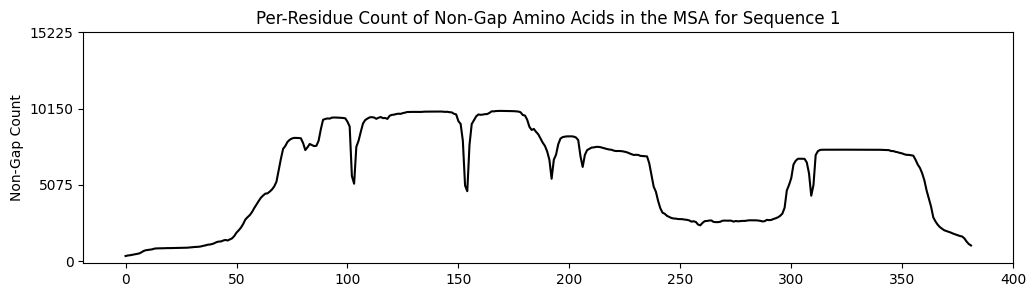

In [ ]:
#@title 4. Search against genetic databases

#@markdown Once this cell has been executed, you will see
#@markdown statistics about the multiple sequence alignment
#@markdown (MSA) that will be used by AlphaFold. In particular,
#@markdown you’ll see how well each residue is covered by similar
#@markdown sequences in the MSA.

# Track cell execution to ensure correct order
notebook_utils.check_cell_execution_order(executed_cells, 4)

# --- Python imports ---
import collections
import copy
from concurrent import futures
import json
import random
import shutil

from urllib import request
from google.colab import files
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol

from alphafold.model import model
from alphafold.model import config
from alphafold.model import data

from alphafold.data import feature_processing
from alphafold.data import msa_pairing
from alphafold.data import pipeline
from alphafold.data import pipeline_multimer
from alphafold.data.tools import jackhmmer

from alphafold.common import confidence
from alphafold.common import protein

from alphafold.relax import relax
from alphafold.relax import utils

from IPython import display
from ipywidgets import GridspecLayout
from ipywidgets import Output

# Color bands for visualizing plddt
PLDDT_BANDS = [(0, 50, '#FF7D45'),
               (50, 70, '#FFDB13'),
               (70, 90, '#65CBF3'),
               (90, 100, '#0053D6')]

# --- Find the closest source ---
test_url_pattern = 'https://storage.googleapis.com/alphafold-colab{:s}/latest/uniref90_2022_01.fasta.1'
ex = futures.ThreadPoolExecutor(3)
def fetch(source):
  request.urlretrieve(test_url_pattern.format(source))
  return source
fs = [ex.submit(fetch, source) for source in ['', '-europe', '-asia']]
source = None
for f in futures.as_completed(fs):
  source = f.result()
  ex.shutdown()
  break

JACKHMMER_BINARY_PATH = '/usr/bin/jackhmmer'
DB_ROOT_PATH = f'https://storage.googleapis.com/alphafold-colab{source}/latest/'
# The z_value is the number of sequences in a database.
MSA_DATABASES = [
    {'db_name': 'uniref90',
     'db_path': f'{DB_ROOT_PATH}uniref90_2022_01.fasta',
     'num_streamed_chunks': 62,
     'z_value': 144_113_457},
    {'db_name': 'smallbfd',
     'db_path': f'{DB_ROOT_PATH}bfd-first_non_consensus_sequences.fasta',
     'num_streamed_chunks': 17,
     'z_value': 65_984_053},
    {'db_name': 'mgnify',
     'db_path': f'{DB_ROOT_PATH}mgy_clusters_2022_05.fasta',
     'num_streamed_chunks': 120,
     'z_value': 623_796_864},
]

# Search UniProt and construct the all_seq features only for heteromers, not homomers.
if model_type_to_use == ModelType.MULTIMER and len(set(sequences)) > 1:
  MSA_DATABASES.extend([
      # Swiss-Prot and TrEMBL are concatenated together as UniProt.
      {'db_name': 'uniprot',
       'db_path': f'{DB_ROOT_PATH}uniprot_2021_04.fasta',
       'num_streamed_chunks': 101,
       'z_value': 225_013_025 + 565_928},
  ])

TOTAL_JACKHMMER_CHUNKS = sum([cfg['num_streamed_chunks'] for cfg in MSA_DATABASES])

MAX_HITS = {
    'uniref90': 10_000,
    'smallbfd': 5_000,
    'mgnify': 501,
    'uniprot': 50_000,
}


def get_msa(sequences):
  """Searches for MSA for given sequences using chunked Jackhmmer search.

  Args:
    sequences: A list of sequences to search against all databases.

  Returns:
    A dictionary mapping unique sequences to dicionaries mapping each database
    to a list of  results, one for each chunk of the database.
  """
  sequence_to_fasta_path = {}
  # Deduplicate to not do redundant work for multiple copies of the same chain in homomers.
  for sequence_index, sequence in enumerate(sorted(set(sequences)), 1):
    fasta_path = f'target_{sequence_index:02d}.fasta'
    with open(fasta_path, 'wt') as f:
      f.write(f'>query\n{sequence}')
    sequence_to_fasta_path[sequence] = fasta_path

  # Run the search against chunks of genetic databases (since the genetic
  # databases don't fit in Colab disk).
  raw_msa_results = {sequence: {} for sequence in sequence_to_fasta_path.keys()}
  print('\nGetting MSA for all sequences')
  with tqdm.notebook.tqdm(total=TOTAL_JACKHMMER_CHUNKS, bar_format=TQDM_BAR_FORMAT) as pbar:
    def jackhmmer_chunk_callback(i):
      pbar.update(n=1)

    for db_config in MSA_DATABASES:
      db_name = db_config['db_name']
      pbar.set_description(f'Searching {db_name}')
      jackhmmer_runner = jackhmmer.Jackhmmer(
          binary_path=JACKHMMER_BINARY_PATH,
          database_path=db_config['db_path'],
          get_tblout=True,
          num_streamed_chunks=db_config['num_streamed_chunks'],
          streaming_callback=jackhmmer_chunk_callback,
          z_value=db_config['z_value'])
      # Query all unique sequences against each chunk of the database to prevent
      # redunantly fetching each chunk for each unique sequence.
      results = jackhmmer_runner.query_multiple(list(sequence_to_fasta_path.values()))
      for sequence, result_for_sequence in zip(sequence_to_fasta_path.keys(), results):
        raw_msa_results[sequence][db_name] = result_for_sequence

  return raw_msa_results


features_for_chain = {}
raw_msa_results_for_sequence = get_msa(sequences)
for sequence_index, sequence in enumerate(sequences, start=1):
  raw_msa_results = copy.deepcopy(raw_msa_results_for_sequence[sequence])

  # Extract the MSAs from the Stockholm files.
  # NB: deduplication happens later in pipeline.make_msa_features.
  single_chain_msas = []
  uniprot_msa = None
  for db_name, db_results in raw_msa_results.items():
    merged_msa = notebook_utils.merge_chunked_msa(
        results=db_results, max_hits=MAX_HITS.get(db_name))
    if merged_msa.sequences and db_name != 'uniprot':
      single_chain_msas.append(merged_msa)
      msa_size = len(set(merged_msa.sequences))
      print(f'{msa_size} unique sequences found in {db_name} for sequence {sequence_index}')
    elif merged_msa.sequences and db_name == 'uniprot':
      uniprot_msa = merged_msa

  notebook_utils.show_msa_info(single_chain_msas=single_chain_msas, sequence_index=sequence_index)

  # Turn the raw data into model features.
  feature_dict = {}
  feature_dict.update(pipeline.make_sequence_features(
      sequence=sequence, description='query', num_res=len(sequence)))
  feature_dict.update(pipeline.make_msa_features(msas=single_chain_msas))
  # We don't use templates in AlphaFold Colab notebook, add only empty placeholder features.
  feature_dict.update(notebook_utils.empty_placeholder_template_features(
      num_templates=0, num_res=len(sequence)))

  # Construct the all_seq features only for heteromers, not homomers.
  if model_type_to_use == ModelType.MULTIMER and len(set(sequences)) > 1:
    valid_feats = msa_pairing.MSA_FEATURES + (
        'msa_species_identifiers',
    )
    all_seq_features = {
        f'{k}_all_seq': v for k, v in pipeline.make_msa_features([uniprot_msa]).items()
        if k in valid_feats}
    feature_dict.update(all_seq_features)

  features_for_chain[protein.PDB_CHAIN_IDS[sequence_index - 1]] = feature_dict


# Do further feature post-processing depending on the model type.
if model_type_to_use == ModelType.MONOMER:
  np_example = features_for_chain[protein.PDB_CHAIN_IDS[0]]

elif model_type_to_use == ModelType.MULTIMER:
  all_chain_features = {}
  for chain_id, chain_features in features_for_chain.items():
    all_chain_features[chain_id] = pipeline_multimer.convert_monomer_features(
        chain_features, chain_id)

  all_chain_features = pipeline_multimer.add_assembly_features(all_chain_features)

  np_example = feature_processing.pair_and_merge(
      all_chain_features=all_chain_features)

  # Pad MSA to avoid zero-sized extra_msa.
  np_example = pipeline_multimer.pad_msa(np_example, min_num_seq=512)

executed_cells.add(4)

  0%|          | 0/6 [elapsed: 00:00 remaining: ?]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

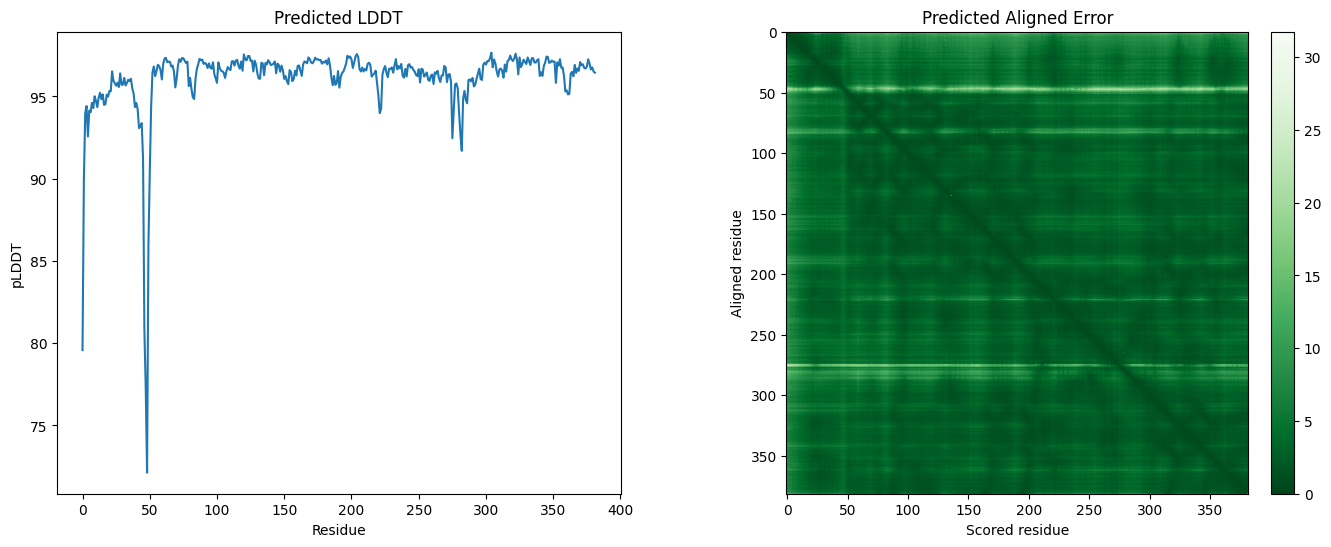

In [ ]:
#@title 5. Run AlphaFold and download prediction

#@markdown Once this cell has been executed, a zip-archive with
#@markdown the obtained prediction will be automatically downloaded
#@markdown to your computer.

#@markdown In case you are having issues with the relaxation stage, you can disable it below.
#@markdown Warning: This means that the prediction might have distracting
#@markdown small stereochemical violations.

run_relax = True  #@param {type:"boolean"}

#@markdown Relaxation is faster with a GPU, but we have found it to be less stable.
#@markdown You may wish to enable GPU for higher performance, but if it doesn't
#@markdown converge we suggested reverting to using without GPU.

relax_use_gpu = False  #@param {type:"boolean"}


#@markdown The multimer model will continue recycling until the predictions stop
#@markdown changing, up to the limit set here. For higher accuracy, at the
#@markdown potential cost of longer inference times, set this to 20.

multimer_model_max_num_recycles = 3  #@param {type:"integer"}

# Track cell execution to ensure correct order
notebook_utils.check_cell_execution_order(executed_cells, 5)

# --- Run the model ---
if model_type_to_use == ModelType.MONOMER:
  model_names = config.MODEL_PRESETS['monomer'] + ('model_2_ptm',)
elif model_type_to_use == ModelType.MULTIMER:
  model_names = config.MODEL_PRESETS['multimer']

output_dir = 'prediction'
os.makedirs(output_dir, exist_ok=True)

plddts = {}
ranking_confidences = {}
pae_outputs = {}
unrelaxed_proteins = {}

with tqdm.notebook.tqdm(total=len(model_names) + 1, bar_format=TQDM_BAR_FORMAT) as pbar:
  for model_name in model_names:
    pbar.set_description(f'Running {model_name}')

    cfg = config.model_config(model_name)

    if model_type_to_use == ModelType.MONOMER:
      cfg.data.eval.num_ensemble = 1
    elif model_type_to_use == ModelType.MULTIMER:
      cfg.model.num_ensemble_eval = 1

    if model_type_to_use == ModelType.MULTIMER:
      cfg.model.num_recycle = multimer_model_max_num_recycles
      cfg.model.recycle_early_stop_tolerance = 0.5

    params = data.get_model_haiku_params(model_name, './alphafold/data')
    model_runner = model.RunModel(cfg, params)
    processed_feature_dict = model_runner.process_features(np_example, random_seed=0)
    prediction = model_runner.predict(processed_feature_dict, random_seed=random.randrange(sys.maxsize))

    mean_plddt = prediction['plddt'].mean()

    if model_type_to_use == ModelType.MONOMER:
      if 'predicted_aligned_error' in prediction:
        pae_outputs[model_name] = (prediction['predicted_aligned_error'],
                                   prediction['max_predicted_aligned_error'])
      else:
        # Monomer models are sorted by mean pLDDT. Do not put monomer pTM models here as they
        # should never get selected.
        ranking_confidences[model_name] = prediction['ranking_confidence']
        plddts[model_name] = prediction['plddt']
    elif model_type_to_use == ModelType.MULTIMER:
      # Multimer models are sorted by pTM+ipTM.
      ranking_confidences[model_name] = prediction['ranking_confidence']
      plddts[model_name] = prediction['plddt']
      pae_outputs[model_name] = (prediction['predicted_aligned_error'],
                                 prediction['max_predicted_aligned_error'])

    # Set the b-factors to the per-residue plddt.
    final_atom_mask = prediction['structure_module']['final_atom_mask']
    b_factors = prediction['plddt'][:, None] * final_atom_mask
    unrelaxed_protein = protein.from_prediction(
        processed_feature_dict,
        prediction,
        b_factors=b_factors,
        remove_leading_feature_dimension=(
            model_type_to_use == ModelType.MONOMER))
    unrelaxed_proteins[model_name] = unrelaxed_protein

    # Delete unused outputs to save memory.
    del model_runner
    del params
    del prediction
    pbar.update(n=1)

  # --- AMBER relax the best model ---

  # Find the best model according to the mean pLDDT.
  best_model_name = max(ranking_confidences.keys(), key=lambda x: ranking_confidences[x])

  if run_relax:
    pbar.set_description(f'AMBER relaxation')
    amber_relaxer = relax.AmberRelaxation(
        max_iterations=0,
        tolerance=2.39,
        stiffness=10.0,
        exclude_residues=[],
        max_outer_iterations=3,
        use_gpu=relax_use_gpu)
    relaxed_pdb, _, _ = amber_relaxer.process(prot=unrelaxed_proteins[best_model_name])
  else:
    print('Warning: Running without the relaxation stage.')
    relaxed_pdb = protein.to_pdb(unrelaxed_proteins[best_model_name])
  pbar.update(n=1)  # Finished AMBER relax.

# Construct multiclass b-factors to indicate confidence bands
# 0=very low, 1=low, 2=confident, 3=very high
banded_b_factors = []
for plddt in plddts[best_model_name]:
  for idx, (min_val, max_val, _) in enumerate(PLDDT_BANDS):
    if plddt >= min_val and plddt <= max_val:
      banded_b_factors.append(idx)
      break
banded_b_factors = np.array(banded_b_factors)[:, None] * final_atom_mask
to_visualize_pdb = utils.overwrite_b_factors(relaxed_pdb, banded_b_factors)


# Write out the prediction
pred_output_path = os.path.join(output_dir, 'selected_prediction.pdb')
with open(pred_output_path, 'w') as f:
  f.write(relaxed_pdb)


# --- Visualise the prediction & confidence ---
show_sidechains = True
def plot_plddt_legend():
  """Plots the legend for pLDDT."""
  thresh = ['Very low (pLDDT < 50)',
            'Low (70 > pLDDT > 50)',
            'Confident (90 > pLDDT > 70)',
            'Very high (pLDDT > 90)']

  colors = [x[2] for x in PLDDT_BANDS]

  plt.figure(figsize=(2, 2))
  for c in colors:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False, loc='center', fontsize=20)
  plt.xticks([])
  plt.yticks([])
  ax = plt.gca()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  plt.title('Model Confidence', fontsize=20, pad=20)
  return plt

# Show the structure coloured by chain if the multimer model has been used.
if model_type_to_use == ModelType.MULTIMER:
  multichain_view = py3Dmol.view(width=800, height=600)
  multichain_view.addModelsAsFrames(to_visualize_pdb)
  multichain_style = {'cartoon': {'colorscheme': 'chain'}}
  multichain_view.setStyle({'model': -1}, multichain_style)
  multichain_view.zoomTo()
  multichain_view.show()

# Color the structure by per-residue pLDDT
color_map = {i: bands[2] for i, bands in enumerate(PLDDT_BANDS)}
view = py3Dmol.view(width=800, height=600)
view.addModelsAsFrames(to_visualize_pdb)
style = {'cartoon': {'colorscheme': {'prop': 'b', 'map': color_map}}}
if show_sidechains:
  style['stick'] = {}
view.setStyle({'model': -1}, style)
view.zoomTo()

grid = GridspecLayout(1, 2)
out = Output()
with out:
  view.show()
grid[0, 0] = out

out = Output()
with out:
  plot_plddt_legend().show()
grid[0, 1] = out

display.display(grid)

# Display pLDDT and predicted aligned error (if output by the model).
if pae_outputs:
  num_plots = 2
else:
  num_plots = 1

plt.figure(figsize=[8 * num_plots, 6])
plt.subplot(1, num_plots, 1)
plt.plot(plddts[best_model_name])
plt.title('Predicted LDDT')
plt.xlabel('Residue')
plt.ylabel('pLDDT')

if num_plots == 2:
  plt.subplot(1, 2, 2)
  pae, max_pae = list(pae_outputs.values())[0]
  plt.imshow(pae, vmin=0., vmax=max_pae, cmap='Greens_r')
  plt.colorbar(fraction=0.046, pad=0.04)

  # Display lines at chain boundaries.
  best_unrelaxed_prot = unrelaxed_proteins[best_model_name]
  total_num_res = best_unrelaxed_prot.residue_index.shape[-1]
  chain_ids = best_unrelaxed_prot.chain_index
  for chain_boundary in np.nonzero(chain_ids[:-1] - chain_ids[1:]):
    if chain_boundary.size:
      plt.plot([0, total_num_res], [chain_boundary, chain_boundary], color='red')
      plt.plot([chain_boundary, chain_boundary], [0, total_num_res], color='red')

  plt.title('Predicted Aligned Error')
  plt.xlabel('Scored residue')
  plt.ylabel('Aligned residue')

# Save the predicted aligned error (if it exists).
pae_output_path = os.path.join(output_dir, 'predicted_aligned_error.json')
if pae_outputs:
  # Save predicted aligned error in the same format as the AF EMBL DB.
  pae_data = confidence.pae_json(pae=pae, max_pae=max_pae.item())
  with open(pae_output_path, 'w') as f:
    f.write(pae_data)

# --- Download the predictions ---
shutil.make_archive(base_name='prediction', format='zip', root_dir=output_dir)
files.download(f'{output_dir}.zip')

executed_cells.add(5)

https://www.genecards.org/cgi-bin/carddisp.pl?gene=AADAC

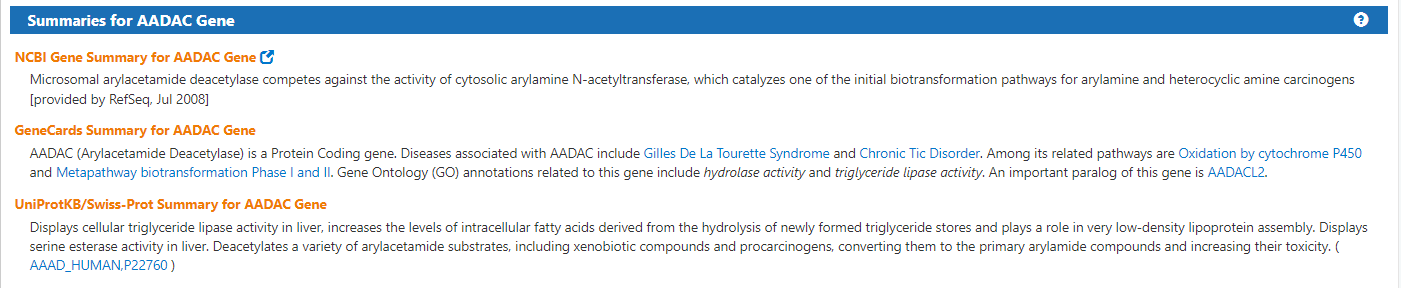

Выводы: предположительно качество по сравнению с некими найдеными в базе - неравномерное. В начале совсем плохо, затем есть где-то лучше. По LDDT вроде бы качество сборки достаточное.

Белок имеет глобулу и некий хвост. Белок, судя по саммари, белок видимо катализирует некоторые реакции.